In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [75]:
def limit_w(id,w1,w2,w3):
    if id==1:
        return [max(30,w3-w2),w2]
    elif id==2:
        return [max(w1,w3-w1),w3]
    else:
        return [w2,min(160,w1+w2)]

def limit_c(id,w1,w2,w3):
    if id==1:
        return [w2-w3,-w2+w3]
    else:
        return [w1-w2,w2-w1]
    

In [76]:
def check_limit(w1,w2,w3,dx,dy):
    ws=[w1,w2,w3]
    for idx in range(3):
        lim = limit_w(idx+1,w1,w2,w3)
        if ws[idx]<lim[0] or ws[idx]>lim[1]:
            print(f'w{(idx+1)}={ws[idx]} is outside of the expected range ([{lim[0]},{lim[1]}])')
   
    lim_dx = limit_c(1,w1,w2,w3)
    if dx<lim_dx[0] or dx>lim_dx[1]:
        print(f'dx={dx} is outside of the expected range ([{lim_dx[0]},{lim_dx[1]}])')
    lim_dy = limit_c(2,w1,w2,w3)
    if dy<lim_dy[0] or dy>lim_dy[1]:
        print(f'dy={dy} is outside of the expected range ([{lim_dy[0]},{lim_dy[1]}])')
    
    

In [114]:
# Dimensions
w1=80
w2=100
w3=115
height=468

# Tip center offset
dx=-10
dy=0

# Crystal tilt (°)
alpha = 60 * np.pi/180
theta = 10 * np.pi/180
alpha_face = 40 * np.pi/180

check_limit(w1,w2,w3,dx,dy)

In [115]:
dw1 = -dy
dw2 = 0.866*dx-0.5*dy
dw3 = 0.866*dx+0.5*dy

tan_alpha = np.tan(alpha_face)
cos_alpha = np.cos(alpha_face)

h1 = (w1 +dw1)/tan_alpha
h2 = (w2 +dw2)/tan_alpha
h3 = (w3 +dw3)/tan_alpha
h4 = (w1 -dw1)/tan_alpha
h5 = (w2 -dw2)/tan_alpha
h6 = (w3 -dw3)/tan_alpha

c1 = (w1)/0.866
c2 = (w2)/0.866
c3 = (w3)/0.866

d1 = (w1 +dw1)/0.866
d2 = (w2 +dw2)/0.866
d3 = (w3 +dw3)/0.866
d4 = (w1 -dw1)/0.866
d5 = (w2 -dw2)/0.866
d6 = (w3 -dw3)/0.866

l1 = c2+c3-c1
l2 = c1+c3-c2
l3 = c1+c2-c3

t12 = d2-d1
t23 = d3-d2
t34 = d4-d3
t45 = d5-d4
t56 = d6-d5
t61 = d1-d6

c_b12 = [-l1/2,-w1,-height];
c_b23 = [-l1/2 - l2/2,-w1 + l2*0.866 ,-height];
c_b34 = [-l1/2 - l2/2 + l3/2 ,w1 ,-height];
c_b45 = [l1/2 - l2/2 + l3/2 ,w1 ,-height]; 
c_b56 = [l1/2 +l3/2 ,-w1 +(l3)*0.866 ,-height]; 
c_b16 = [+l1/2,-w1,-height]; 
    
normal = [np.sin(alpha)*np.sin(theta), np.cos(alpha)*np.sin(theta), np.cos(theta)]
dz_1 = -(normal[0]*c_b12[0]+normal[1]*c_b12[1])/normal[2]
dz_2 = -(normal[0]*c_b23[0]+normal[1]*c_b23[1])/normal[2]
dz_3 = -(normal[0]*c_b34[0]+normal[1]*c_b34[1])/normal[2]
dz_4 = -(normal[0]*c_b45[0]+normal[1]*c_b45[1])/normal[2]
dz_5 = -(normal[0]*c_b56[0]+normal[1]*c_b56[1])/normal[2]
dz_6 = -(normal[0]*c_b16[0]+normal[1]*c_b16[1])/normal[2]

c_b12[2] += -dz_1
c_b23[2] += -dz_2
c_b34[2] += -dz_3
c_b45[2] += -dz_4
c_b56[2] += -dz_5
c_b16[2] += -dz_6

tip = [(t12+t61)/2,-dy,0]
c_t1t2 = [- l1/2+t12,-w1,-h1]
c_t1t6 = [+ l1/2+t61,-w1,-h1]
c_f1t2 = [-l1/2,-w1,-h2]
c_f1t6 = [+l1/2,-w1,-h6]
c_f2t3 = [- l1/2 -(l2-t23)/2 , -dy ,-h2]
c_f2f3 = [-l1/2 - l2/2,-w1 + l2*0.866 ,-h3]
c_f3f4 = [-l1/2 - l2/2 + l3/2 ,w1 ,-h3]
c_t3t4 = [-l1/2 - l2/2 + l3/2 - t34 ,w1 ,-h4]
c_t4t5 = [l1/2 - l2/2 + l3/2 - t45 ,w1 ,-h4]
c_f4f5 = [l1/2 - l2/2 + l3/2 ,w1 ,-h5]
c_f5f6 = [l1/2 +l3/2 ,-w1 +(l3)*0.866,-h6]
c_f5t6 = [l1/2-l2/2+l3/2 +(l2-t56)/2 ,-dy ,-h5]

all_points = [c_b12,c_b23,c_b34,c_b45,c_b56,c_b16,tip,c_t1t2, \
              c_t1t6,c_f1t2,c_f1t6,c_f2t3,c_f2f3,c_f3f4,c_t3t4, \
              c_t4t5,c_f4f5,c_f5f6,c_f5t6]

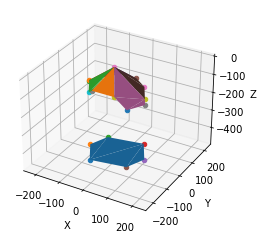

In [121]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for p in all_points:
    ax.scatter(p[0], p[1], p[2], marker='o')
    
    
# bottom
ax.plot_trisurf([c_b12[0],c_b23[0],c_b34[0],c_b45[0],c_b56[0],c_b16[0]],\
                [c_b12[1],c_b23[1],c_b34[1],c_b45[1],c_b56[1],c_b16[1]], \
                [c_b12[2],c_b23[2],c_b34[2],c_b45[2],c_b56[2],c_b16[2]],\
                antialiased=True)
# tips
ax.plot_trisurf([c_t1t2[0],tip[0],c_t1t6[0]],\
                [c_t1t2[1],tip[1],c_t1t6[1]], \
                [c_t1t2[2],tip[2],c_t1t6[2]],\
                antialiased=True)
ax.plot_trisurf([c_f2t3[0],tip[0],c_t1t2[0],c_f1t2[0]],\
                [c_f2t3[1],tip[1],c_t1t2[1],c_f1t2[1]], \
                [c_f2t3[2],tip[2],c_t1t2[2],c_f1t2[2]],\
                antialiased=True)
ax.plot_trisurf([c_t3t4[0],tip[0],c_f2t3[0],c_f2f3[0],c_f3f4[0]],\
                [c_t3t4[1],tip[1],c_f2t3[1],c_f2f3[1],c_f3f4[1]], \
                [c_t3t4[2],tip[2],c_f2t3[2],c_f2f3[2],c_f3f4[2]],\
                antialiased=True)
ax.plot_trisurf([c_t4t5[0],tip[0],c_t3t4[0]],\
                [c_t4t5[1],tip[1],c_t3t4[1]], \
                [c_t4t5[2],tip[2],c_t3t4[2]],\
                antialiased=True)
ax.plot_trisurf([c_f5t6[0],tip[0],c_t4t5[0],c_f4f5[0]],\
                [c_f5t6[1],tip[1],c_t4t5[1],c_f4f5[1]], \
                [c_f5t6[2],tip[2],c_t4t5[2],c_f4f5[2]],\
                antialiased=True)
ax.plot_trisurf([c_t1t6[0],tip[0],c_f5t6[0],c_f5f6[0],c_f1t6[0]],\
                [c_t1t6[1],tip[1],c_f5t6[1],c_f5f6[1],c_f1t6[1]], \
                [c_t1t6[2],tip[2],c_f5t6[2],c_f5f6[2],c_f1t6[2]],\
                antialiased=True)


# faces
'''traceFaceClose(svg,[c_f1t6,c_b16,c_b12,c_f1t2,c_t1t2,c_t1t6],alpha,theta,omega,center_x,10);
    traceFaceClose(svg,[c_f1t2,c_b12,c_b23,c_f2f3,c_f2t3],alpha,theta,omega,center_x,10);
    traceFaceClose(svg,[c_f2f3,c_b23,c_b34,c_f3f4],alpha,theta,omega,center_x,10);
    traceFaceClose(svg,[c_f3f4,c_b34,c_b45,c_f4f5,c_t4t5,c_t3t4],alpha,theta,omega,center_x,10);
    traceFaceClose(svg,[c_f4f5,c_b45,c_b56,c_f5f6,c_f5t6],alpha,theta,omega,center_x,10);
    traceFaceClose(svg,[c_f5f6,c_b56,c_b16,c_f1t6],alpha,theta,omega,center_x,10);
    ''''
max_p = np.max(np.max(np.array(all_points),axis=0)-np.min(np.array(all_points),axis=0))
ax.axes.set_xlim3d(left=-max_p/2, right=max_p/2) 
ax.axes.set_ylim3d(bottom=-max_p/2, top=max_p/2) 
ax.axes.set_zlim3d(bottom=-max_p, top=0)     

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
